In [210]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tiktok/TikToksongs2022.csv


In [211]:
import numpy as np # linear algebra
import pandas as pd

In [212]:
pd.read_csv('/kaggle/input/tiktok/TikToksongs2022.csv')

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.350000,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.440000,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.099500,0.000000,0.3350,0.722,108.966,4,191822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320
259,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365
261,Good Looking,Suki Waterhouse,64,Good Looking,80,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,3,214800


In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

<h1 id="1.-Exploratory-Data-Analysis"><p style="background-color:#A378C6;color:white;font-size:100%;text-align:center;border-radius:100px 100px;">1. Exploratory Data Analysis</p><a class="anchor-link" href="#1.-Exploratory-Data-Analysis">&#182;</a></h1><p>In this section, I will explore the dataset and try to answer the different questions asked above.</p>

In [214]:
df = pd.read_csv("/kaggle/input/tiktok/TikToksongs2022.csv")
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 263 observations for 18 predictors.


,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [215]:
df.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

This shows there are no missing values

In [216]:
df.describe(include='all')

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,263,263,263.000000,263,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
unique,258,199,NaN,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Say It Right,Doja Cat,NaN,Planet Her,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,8,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,64.186312,NaN,59.844106,0.715338,0.682631,-6.300513,0.536122,5.809886,0.117268,0.193188,0.020244,0.202562,0.506149,122.883696,3.969582,174656.212928
std,NaN,NaN,18.146338,NaN,24.976524,0.117722,0.141756,1.905114,0.499644,3.657312,0.101417,0.214588,0.109370,0.151808,0.220757,24.396686,0.288168,34785.125564
min,NaN,NaN,18.000000,NaN,0.000000,0.308000,0.214000,-13.468000,0.000000,0.000000,0.025200,0.000038,0.000000,0.026500,0.036300,62.948000,1.000000,85742.000000
25%,NaN,NaN,50.000000,NaN,47.000000,0.646000,0.593000,-7.423500,0.000000,2.000000,0.044750,0.028100,0.000000,0.094350,0.349000,106.850500,4.000000,148646.000000
50%,NaN,NaN,64.000000,NaN,66.000000,0.726000,0.701000,-6.067000,1.000000,6.000000,0.070700,0.120000,0.000003,0.132000,0.485000,123.056000,4.000000,171028.000000
75%,NaN,NaN,81.000000,NaN,79.500000,0.796500,0.790500,-4.887000,1.000000,9.000000,0.156000,0.298500,0.000334,0.277500,0.680000,130.004500,4.000000,199047.000000


<Axes: xlabel='track_pop'>

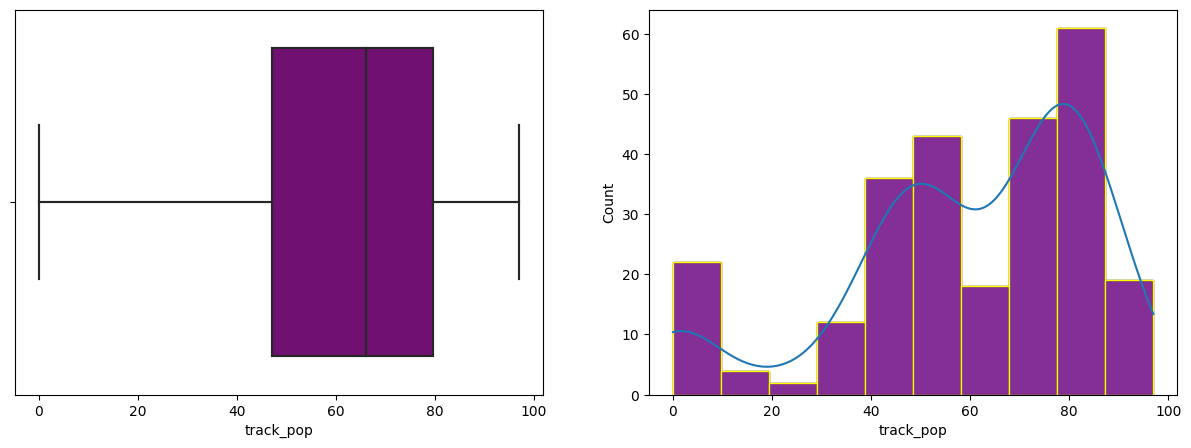

In [217]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.histplot(x = 'track_pop', data=df, kde = True)
sns.histplot(data=df, x='track_pop', color='purple', edgecolor='yellow')
plt.subplot(1,2,1)
sns.boxplot(x = 'track_pop', data = df)
sns.boxplot(data=df, x='track_pop', color='purple')

<blockquote><p>📌 The average popularity is 65 and the scores go between 0 and 100.</p>
</blockquote>

<h1> <span style="color:purple"> What are the most popular tracks? </h1>
</div>

In [218]:
df.groupby("track_pop").track_name.max()[:5]

track_pop
0                       Without You
1    Write This Down (Instrumental)
2                         Aesthetic
3                         positions
4                      WHATS POPPIN
Name: track_name, dtype: object

<blockquote><p>📌 The most famous tracks are "Without You", "Write This Down (Instrumental)", "Aesthetic", "Positions" and "WHATS POPPIN:.</p>
</blockquote>

<h1> <span style="color:purple"> Who are the most popular artists? </h1>

In [219]:
top_artists = df[["artist_name", "artist_pop"]].sort_values('artist_pop',ascending=False)
top_artists = top_artists.artist_name.unique()[:5]
top_artists

array(['Drake', 'The Weeknd', 'Harry Styles', 'Ed Sheeran',
       'Justin Bieber'], dtype=object)

In [220]:
df.loc[~df["artist_name"].isin(top_artists),'artist_name'] = 'Other'

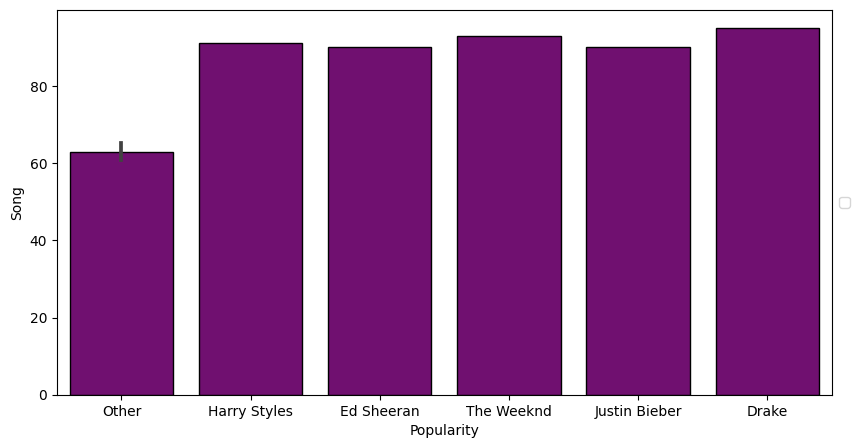

In [221]:
plt.figure(figsize=(10,5))

sns.barplot(data=df[["artist_name", "artist_pop"]], x='artist_name', color='purple', edgecolor='black', y='artist_pop')
plt.ylabel('Song')
plt.xlabel('Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [222]:
most_artists = df[["artist_name"]].value_counts().sort_values(ascending=False)
most_artists = pd.DataFrame(most_artists[:5]).reset_index().artist_name
most_artists

0           Other
1      The Weeknd
2           Drake
3      Ed Sheeran
4    Harry Styles
Name: artist_name, dtype: object

In [223]:
df.loc[~df["artist_name"].isin(most_artists),'artist_name'] = 'Other'

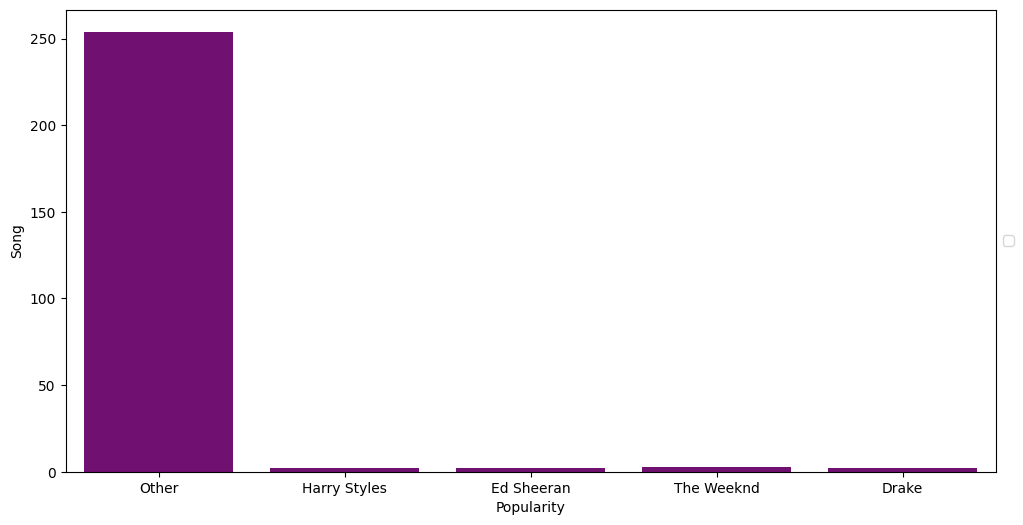

In [224]:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x="artist_name", color='purple')
plt.ylabel('Song')
plt.xlabel('Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<h3>📌 Some artists seem to have more tracks in the most popular tracks. But the most popular artists are Drake, The Weeknd, Harry Styles, Ed Sheeran, Justin Bieber. </h3>

<h1> <span style="color:purple"> How do the different mood descriptions of the track influence the popularity? </h1>

In [225]:
columns_mood = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence","track_pop"]

mask = np.triu(np.ones_like(df[columns_mood].corr(), dtype=bool))

plt.figure(figsize = (20,18))


<Figure size 2000x1800 with 0 Axes>

<Figure size 2000x1800 with 0 Axes>


<h1><span style="color:purple">Does the duration of the track influence its popularity?</span>.</h1>

<Axes: xlabel='duration_ms', ylabel='track_pop'>

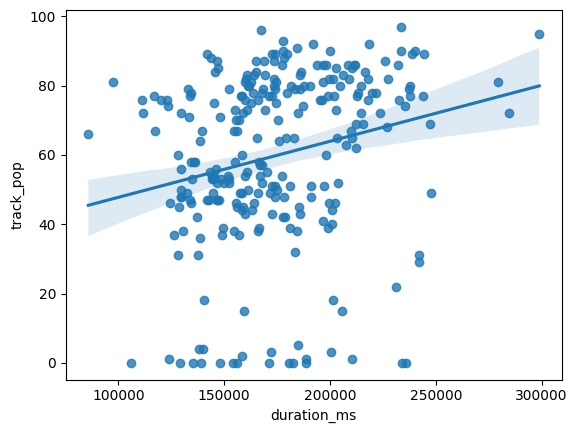

In [226]:
sns.regplot(x=df["duration_ms"], y=df["track_pop"])

📌 There is a slight link between the duration of the track and the popularity.

General importance of every predictor:

In [227]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [228]:
def load_data():
    # Read data
    df = pd.read_csv("../input/tiktok-popular-songs-2022/TikTok_songs_2022.csv",index_col=0)
    df = df[["artist_name", "danceability", "energy", "speechiness", "acousticness", "liveness", "mode", "tempo", "time_signature", "track_pop"]]
    # Preprocessing the data
    
    dummies = pd.get_dummies(df["artist_name"], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    df.drop(columns=["artist_name"], inplace=True)
    
    X = df.copy()
    y = X.pop("track_pop")
    
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 1,test_size=0.3, shuffle=True)
    
    return xtrain,xtest,ytrain,ytest

# <p style="background-color:#8E3277;color:white;font-size:100%;text-align:center;border-radius:10px 10px;">Take away points</p>

1. The top 5 tracks are Without You, Write This Down (Instrumental), Aesthetic, positions and WHATS POPPIN.

2. The top 5 artists are Drake, The Weeknd, Harry Styles, Ed Sheeran, Justin Bieber.

3. We can try to predict the popularity based on the mood of the song and its accoustic characteritics.